# K-Nearest Neighbor Regression to predict Boston House price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :3]])
#target = boston.values[1::2, 2]
#data
#Convert array into DataFrame and rename columns
boston_data = pd.DataFrame(data, columns =['crime', 'land_zone', 'indus', 'C_River', 'nox','avg_rooms', 'age','dist','r_highway', 'tax', 'pt_ratio','blacks','lstat','price_median_value'])
#boston_data = pd.DataFrame(target, columns =['price_Median_value'])


In [3]:
#preprocessing using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
boston_data=pd.DataFrame(data)
data = scaler.fit_transform(boston_data)

#Convert array into DataFrame and rename columns
boston_data = pd.DataFrame(data, columns =['crime', 'land_zone', 'indus', 'C_River', 'nox','avg_rooms', 'age','dist','r_highway', 'tax', 'pt_ratio','blacks','lstat','price_median_value'])
#boston_data = pd.DataFrame(target, columns =['price_Median_value'])


In [341]:
boston_data

,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# EDA

In [4]:
#droping null, missing values .count() will return no. of rows and .sum() returns sum of true in each rows
nacount=boston_data.isna().sum()
boston_data.dropna()
nullcount=boston_data.isnull().sum()
boston_data.drop_duplicates()
boston_data.info()
boston_data.describe()
boston_original=boston_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime               506 non-null    float64
 1   land_zone           506 non-null    float64
 2   indus               506 non-null    float64
 3   C_River             506 non-null    float64
 4   nox                 506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist                506 non-null    float64
 8   r_highway           506 non-null    float64
 9   tax                 506 non-null    float64
 10  pt_ratio            506 non-null    float64
 11  blacks              506 non-null    float64
 12  lstat               506 non-null    float64
 13  price_median_value  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Check Collineariry/Dependability of Variabels
Coorelation Matrix

In [30]:
boston_data.corr()

,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
land_zone,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
C_River,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dist,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
r_highway,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


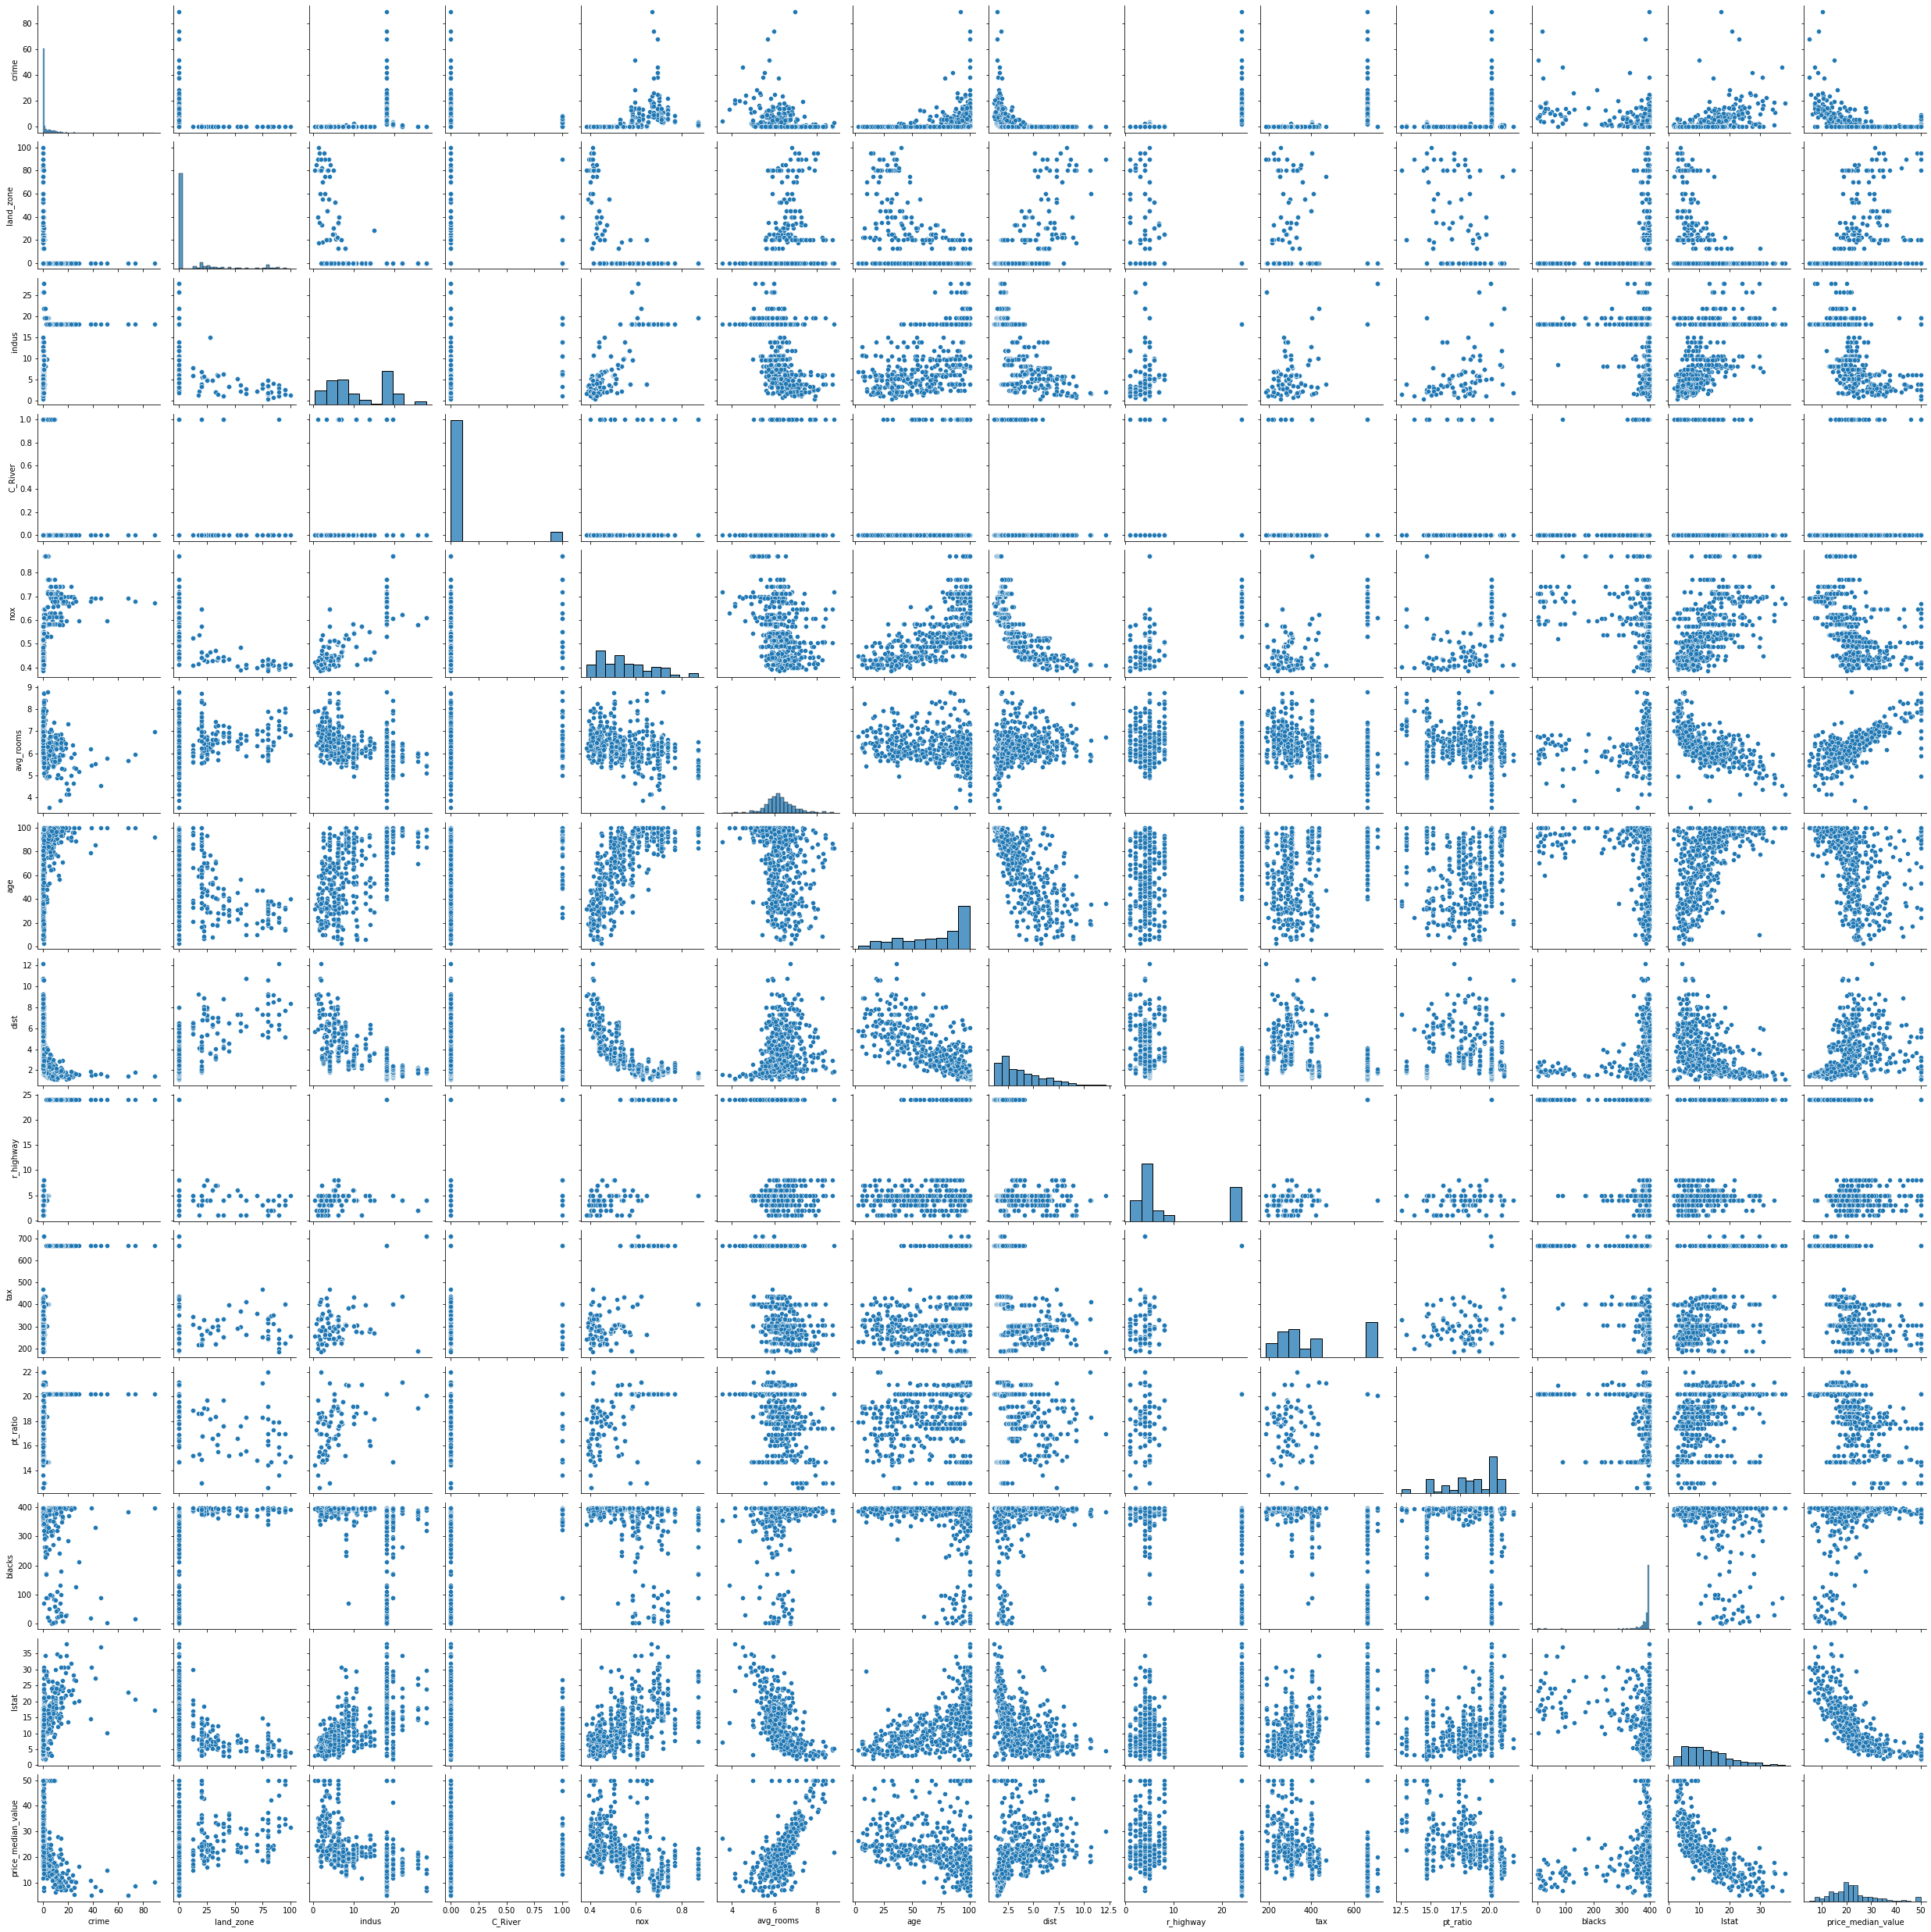

In [19]:
#pLOT Pairplot
sns.pairplot(boston_data)  #colinearity check

# Remove Outliers

In [214]:
boston_data=boston_original

In [319]:
#1. Removal of outliers using z score Execute only once
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh).all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    return(df)
#call function
boston_original=drop_numerical_outliers(boston_original)
boston_data=boston_original
boston_data.shape

(415, 14)

In [5]:
#2. REmove outliers using IQR method

#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
#boston_data=boston_original
boston_data = remove_outlier(boston_original,'crime')
boston_data = remove_outlier(boston_original,'land_zone')
boston_data = remove_outlier(boston_original,'land_zone')
boston_data = remove_outlier(boston_original,'C_River')
boston_data = remove_outlier(boston_original,'nox')
boston_data = remove_outlier(boston_original,'avg_rooms')
boston_data = remove_outlier(boston_original,'age')
boston_data = remove_outlier(boston_original,'dist')
boston_data = remove_outlier(boston_original,'r_highway')
boston_data = remove_outlier(boston_original,'tax')
boston_data = remove_outlier(boston_original,'pt_ratio')
boston_data = remove_outlier(boston_original,'blacks')
boston_data = remove_outlier(boston_original,'lstat')
boston_data.shape

(499, 14)

In [330]:
#3. remove outlier using median imputation
boston_data=boston_original
plt.figure(figsize=(17,1))
for var in range(0,boston_data.shape[1]):
    temp=boston_data.columns[var]
    lower_quant=boston_data[temp].quantile(0.25)
    upper_quant=boston_data[temp].quantile(0.75)
    med=boston_data[temp].median()
    #print("\nColumn :",temp)
    #print("Lower Quantile:",lower_quant, "Upper Quantile :",upper_quant,"Median :",med)
    
    boston_data[temp] = np.where( (boston_data[temp] <lower_quant), med , boston_data[temp]) 
    boston_data[temp] = np.where( (boston_data[temp] >upper_quant), med , boston_data[temp])
    #print("\n",boston_data.columns[var])
    #sns.boxplot(data=boston_data[temp])
   # plt.show()
        
#After Outlier Median imputation 
boston_clean=boston_data
boston_data.shape

(506, 14)

<Figure size 1224x72 with 0 Axes>

# KNN requires input as array

In [311]:
#boston_data=boston_original

In [6]:
#Split Data into X and y
#X= boston_data.iloc[:, :-1]
#Y=boston_data.iloc[:, -1]

array = boston_data.values
#X= array[:, :-1]
#Y= array[:, -1]
X = array[:, 0:13]
Y = array[:, 13]

In [7]:
kfold=KFold(n_splits=5)
model=KNeighborsRegressor(n_neighbors=59)
results=cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.2083654108958588


# Grid Search for Algorithm Tuning

In [9]:
n_neighbors = np.array(range(1,160))
param_grid = dict(n_neighbors=n_neighbors)   #param_grid needs to be dictionary

In [10]:
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

0.39109007203693363
{'n_neighbors': 7}


# Visualizing CV Results

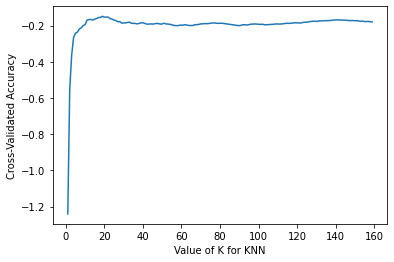

In [335]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 160)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Prediction New data

In [195]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime               506 non-null    float64
 1   land_zone           506 non-null    float64
 2   indus               506 non-null    float64
 3   C_River             506 non-null    float64
 4   nox                 506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist                506 non-null    float64
 8   r_highway           506 non-null    float64
 9   tax                 506 non-null    float64
 10  pt_ratio            506 non-null    float64
 11  blacks              506 non-null    float64
 12  lstat               506 non-null    float64
 13  price_median_value  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
#Data Split
from sklearn.model_selection import train_test_split
train , test = train_test_split(boston_data, test_size = 0.3)

x_train = train.drop('price_median_value', axis=1)
y_train = train['price_median_value']

x_test = test.drop('price_median_value', axis = 1)
y_test = test['price_median_value']

In [12]:
#preprocessing using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

RMSE value for k=  1 is: 0.10089345723055661
RMSE value for k=  2 is: 0.09413085192406694
RMSE value for k=  3 is: 0.09575515568345873
RMSE value for k=  4 is: 0.09768767944858442
RMSE value for k=  5 is: 0.10392643805475567
RMSE value for k=  6 is: 0.10397365657705196
RMSE value for k=  7 is: 0.10522053210400176
RMSE value for k=  8 is: 0.1023221155431127
RMSE value for k=  9 is: 0.1011652799120126
RMSE value for k=  10 is: 0.09708719936137507
RMSE value for k=  11 is: 0.0951808843277942
RMSE value for k=  12 is: 0.09332574435147188
RMSE value for k=  13 is: 0.09425995981771614
RMSE value for k=  14 is: 0.09427410008099857
RMSE value for k=  15 is: 0.09471879088193778
RMSE value for k=  16 is: 0.09584414861140593
RMSE value for k=  17 is: 0.09608756881541851
RMSE value for k=  18 is: 0.09687633894297856
RMSE value for k=  19 is: 0.09817342005420257
RMSE value for k=  20 is: 0.09830290175690216
RMSE value for k=  21 is: 0.09914390020352162
RMSE value for k=  22 is: 0.10017956567944959


<AxesSubplot:>

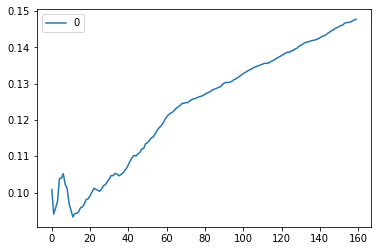

In [13]:
#Error Rate

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(160):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [19]:
#predicting on the test set and creating submission file
data_pred=pd.DataFrame(data=np.array([[0.25651,0.0,9.69,0.0,0.538,6.5750,65.2,4.09000,5.0,296.0,19.05,391.44,11.36]]),columns=['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'])
#data_pred=pd.DataFrame(data=np.array([[6.25651,5.0,2.07,3.0,6.469,4.4210,78.5,3.96710,3.0,330.1,30.80,391.48,15.14]]),columns=['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'])

#data_pred
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the 

predict = model.predict(x_train)
accuracy=model.score(x_test, y_test)*100

print("\nAccuracy of Model is :",accuracy)
print("\nPrediction is :",predict)



Accuracy of Model is : 68.33250709707093

Prediction is : [0.50412698 0.81492063 0.59111111 0.21936508 0.30698413 0.3584127
 0.1415873  0.6031746  0.34603175 0.2447619  0.42857143 0.38634921
 0.38698413 0.34285714 0.64825397 0.21238095 0.42603175 0.52222222
 0.33428571 0.37047619 0.64222222 0.41301587 0.60222222 0.22761905
 0.32253968 0.37174603 0.33047619 0.36698413 0.37269841 0.49587302
 0.38126984 0.38698413 0.69587302 0.21047619 0.35079365 0.45460317
 0.77142857 0.26539683 0.56126984 0.33142857 0.22412698 0.5047619
 0.56857143 0.4568254  0.38888889 0.28666667 0.12888889 0.63873016
 0.45746032 0.38634921 0.35460317 0.32380952 0.40539683 0.19809524
 0.21873016 0.55555556 0.20095238 0.39206349 0.42857143 0.40603175
 0.11079365 0.73365079 0.70825397 0.57809524 0.20603175 0.50952381
 0.31428571 0.30857143 0.34095238 0.3552381  0.36666667 0.1631746
 0.33873016 0.6231746  0.37079365 0.4168254  0.12412698 0.27555556
 0.59111111 0.21650794 0.33555556 0.33746032 0.20952381 0.09301587
 0.305